# EDA, Sentiment analysis, Sarcasm Detection on Twitter Dataset

### We have a twitter dataset consisting of tweet_ids, tweet_texts, usernames and date. Initially, we will be doing Exploratory Data Analysis on the dataset, cleaning out unnecessary values, visually plotting our results.
### We will then perform Sentiment Analysis using Textblob's inbuilt sentiment function and also by fitting a model on a labeled dataset and then predicting the sentiment using the model.
### We will also detect Sarcasm by training our model based on a labeled dataset, then predicting the sarcasm in our tweets.

In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import the libraries
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import string
import re
import seaborn as sns
import unidecode
import itertools
import collections
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\ruchi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
stop_words = set(stopwords.words('english'))

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#### Importing our dataset into a dataframe

In [7]:
tweetsDf = pd.read_csv('tweetsViaAPI_final_merged.csv')
print(tweetsDf)

                        id                                               text  \
0      1326472398770597888  "The trek from summer to winter leaves no spri...   
1      1326472281971945473  Ugly angle (investment opps), grim stats (322 ...   
2      1326472110257172480  Are you afraid of being alone with your though...   
3      1326472025163051008  Morning meditation. There is power &amp; heali...   
4      1326471950416437249  Your mental health is important. Appointments ...   
...                    ...                                                ...   
50785  1387984155720480000  New Zealanders are still reporting negative im...   
50786  1387982811550780000  New Zealanders face mental health, economic ch...   
50787  1387976105584430000  @KevinRArnold @RepTomEmmer @SenatorTimScott @H...   
50788  1387975742315660000  Heartfelt love and strength to all the @uow In...   
50789  1387972233054800000  Women are more likely to have experienced psyc...   

                           

#### As you see the data contains lots of unnecessary values (@ , hashtags(#), RT from retweets, hyperlinks, and punctuations) which may hinder our analysis. Thus, we need to clean our data by removing such values.

In [6]:
# Create a function to clean the tweets
def cleanTxt(text):
    text.lower() #letter casing
    text = unidecode.unidecode(text) #normalize the accents
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = text.translate(str.maketrans('', '', string.punctuation)) #removes punctuation by mapping all punctuations with ''
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT in retweets

    return text

In [9]:
# Clean the tweets
tweetsDf['text'] = tweetsDf['text'].apply(cleanTxt)

# Show the cleaned tweets
tweetsDf

,id,text,Date
0,1326472398770597888,The trek from summer to winter leaves no sprin...,2020-11-11 10:30:39+00:00
1,1326472281971945473,Ugly angle investment opps grim stats 322 mill...,2020-11-11 10:30:11+00:00
2,1326472110257172480,Are you afraid of being alone with your though...,2020-11-11 10:29:30+00:00
3,1326472025163051008,Morning meditation There is power amp healing ...,2020-11-11 10:29:10+00:00
4,1326471950416437249,Your mental health is important Appointments a...,2020-11-11 10:28:52+00:00
...,...,...,...
50785,1387984155720480000,New Zealanders are still reporting negative im...,2021-04-30 04:16:24+00:00
50786,1387982811550780000,New Zealanders face mental health economic cha...,2021-04-30 04:11:04+00:00
50787,1387976105584430000,Oh Kevin\n\nHeres the actual study youre r...,2021-04-30 03:44:25+00:00
50788,1387975742315660000,Heartfelt love and strength to all the Indian...,2021-04-30 03:42:58+00:00


#### Converting date column from string to datetime datatype and sorting them by date value 

In [10]:
tweetsDf['Date'] = pd.to_datetime(tweetsDf['Date'])

In [11]:
tweetsDf.sort_values(by='Date',inplace=True)

In [12]:
tweetsDf = tweetsDf.reset_index(drop=True)

In [13]:
tweetsDf

,id,text,Date
0,1323263994354929665,today i read something that said someone who o...,2020-11-02 14:01:35+00:00
1,1323264982205816834,iso An indiebookpublisher indiebookpublishers...,2020-11-02 14:05:31+00:00
2,1323265640623411203,Struggling with Depression Anxiety Stress or R...,2020-11-02 14:08:08+00:00
3,1323265977945972738,Why Having OCD Does Not Prepare You for Covid1...,2020-11-02 14:09:28+00:00
4,1323266160373235714,Are Alzheimers and depression comorbidities or...,2020-11-02 14:10:12+00:00
...,...,...,...
50785,1390704238473498626,We remain committed to being an essential ment...,2021-05-07 16:25:03+00:00
50786,1390704247856115715,Loneliness is an increasing problem even in us...,2021-05-07 16:25:05+00:00
50787,1390704483932549121,May is Mental Health Month Check out the 2021 ...,2021-05-07 16:26:01+00:00
50788,1390704520515133442,canada belliveau It was an honour and a ple...,2021-05-07 16:26:10+00:00


##### Tokenizing: Turning the tweet text into tokens which are words separated by spaces in a text. This will be used later in our code.

In [7]:
def tokenizeTweets(text):
    tweet_tokens = word_tokenize(text)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]    
    return " ".join(filtered_words)

#### **Exploratory Data Analysis**

#### Wordcloud : A word cloud (also known as text clouds or tag clouds) is a visualization, the more a specific word appears in the text, the bigger and bolder it appears in the word cloud. Since we have fetched tweets around the word 'depression', we'll build a wordcloud around that.

In [12]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


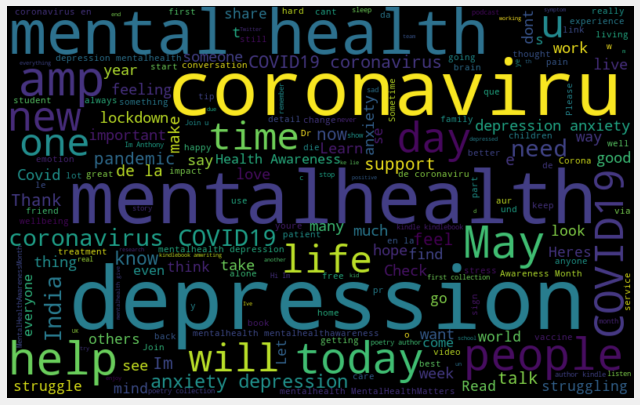

In [13]:
all_words = ' '.join([text for text in tweetsDf['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### From the above wordcloud we see that there are words which are getting repeated. To fix this, we can count the frequencies for every unique word and then build a word cloud.

##### Following loop will split each tweet into list of words

In [14]:
# Create a list of lists containing words for each tweet
words_in_tweet = []
for index, row in tweetsDf.iterrows():
    words_in_tweet.append(row['text'].lower().split())

In [15]:
words_in_tweet[:2]

[['today',
  'i',
  'read',
  'something',
  'that',
  'said',
  'someone',
  'who',
  'overthinks',
  'is',
  'also',
  'someone',
  'who',
  'overloves',
  'i',
  'felt',
  'that',
  'quotes'],
 ['iso',
  'an',
  'indiebookpublisher',
  'indiebookpublishers',
  'that',
  'want',
  'to',
  'work',
  'with',
  'a',
  'gal',
  'with',
  'cerebralpalsy',
  'anxiety']]

##### Counting occurence of each word throughout the dataframe

In [16]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('to', 15650),
 ('the', 14938),
 ('a', 11917),
 ('and', 10939),
 ('of', 10273),
 ('coronavirus', 9964),
 ('depression', 9670),
 ('in', 8676),
 ('mentalhealth', 8087),
 ('is', 8040),
 ('you', 7427),
 ('for', 6947),
 ('i', 5653),
 ('covid19', 5242),
 ('with', 4946)]

In [17]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,to,15650
1,the,14938
2,a,11917
3,and,10939
4,of,10273


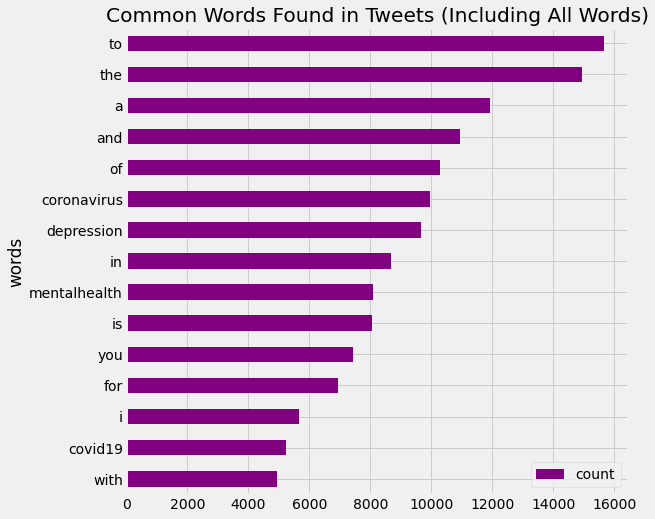

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

#### As we see there are many stopwords (A stop word is a commonly used word (such as “the”, “a”, “an”, “in”)), we can remove by following method. 

In [19]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['before', 'most', 'other', 'in', 't', "you're", 'him', 'of', 'all', 'o']

In [20]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

#for removing collection and certain words
collection_words = ['im', 'get', 'know','like','one','want','de','la','en','new','el']
tweets_nsw = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

tweets_nsw[0]

['today',
 'read',
 'something',
 'said',
 'someone',
 'overthinks',
 'also',
 'someone',
 'overloves',
 'felt',
 'quotes']

In [21]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('coronavirus', 9964),
 ('depression', 9670),
 ('mentalhealth', 8087),
 ('covid19', 5242),
 ('health', 3855),
 ('anxiety', 3698),
 ('mental', 3539),
 ('amp', 2329),
 ('men', 1755),
 ('help', 1694),
 ('may', 1689),
 ('se', 1646),
 ('people', 1588),
 ('covid', 1470),
 ('us', 1378)]

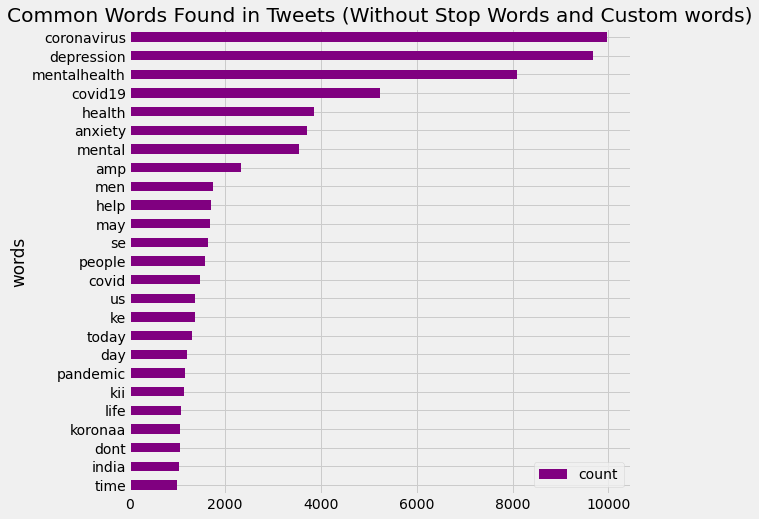

In [22]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(25),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words and Custom words)")

plt.show()

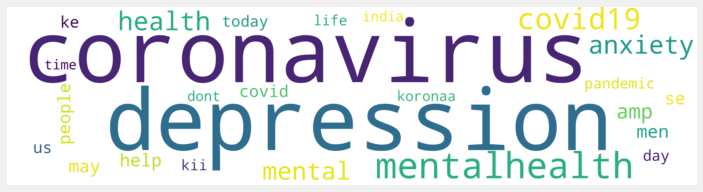

In [23]:
d = {}
#all_words = ' '.join([text for text in all_tweets['tweet']])
for a, x in clean_tweets_nsw.sort_values(by='count').values:
    d[a] = x

wordcloud = WordCloud(background_color="white",width=5800, height=1500)
wordcloud.generate_from_frequencies(frequencies=d)
'''
plt.figure(figsize=(15,7))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()'''


plt.figure(figsize=(11, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### **Sentiment Analysis using TextBlob**
##### Sentiment analysis is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral.
##### The sentiment function of textblob returns two properties, polarity, and subjectivity.

##### Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 
##### Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. 
##### Subjectivity is also a float which lies in the range of [0,1].

In [24]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'

tweetsDf['Subjectivity'] = tweetsDf['text'].apply(getSubjectivity)
tweetsDf['Polarity'] = tweetsDf['text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
tweetsDf

,id,text,Date,Subjectivity,Polarity
0,1323263994354929665,today i read something that said someone who o...,2020-11-02 14:01:35+00:00,0.0000,0.0000
1,1323264982205816834,iso An indiebookpublisher indiebookpublishers...,2020-11-02 14:05:31+00:00,0.0000,0.0000
2,1323265640623411203,Struggling with Depression Anxiety Stress or R...,2020-11-02 14:08:08+00:00,0.0000,0.0000
3,1323265977945972738,Why Having OCD Does Not Prepare You for Covid1...,2020-11-02 14:09:28+00:00,0.6000,0.5000
4,1323266160373235714,Are Alzheimers and depression comorbidities or...,2020-11-02 14:10:12+00:00,0.6375,-0.0125
...,...,...,...,...,...
50785,1390704238473498626,We remain committed to being an essential ment...,2021-05-07 16:25:03+00:00,0.2500,-0.0500
50786,1390704247856115715,Loneliness is an increasing problem even in us...,2021-05-07 16:25:05+00:00,0.6250,-0.3750
50787,1390704483932549121,May is Mental Health Month Check out the 2021 ...,2021-05-07 16:26:01+00:00,0.2000,-0.1000
50788,1390704520515133442,canada belliveau It was an honour and a ple...,2021-05-07 16:26:10+00:00,0.0000,0.0000


#### After we get the scores we will now label the data with out results

In [32]:
# Create a function to compute negative (-1), or neutral/positive for greater than 0 analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

tweetsDf['Analysis'] = tweetsDf['Polarity'].apply(getAnalysis)

# Show the dataframe
tweetsDf

,id,text,Date,Subjectivity,Polarity,Analysis
0,1323263994354929665,today i read something that said someone who o...,2020-11-02 14:01:35+00:00,0.0000,0.0000,Neutral
1,1323264982205816834,iso An indiebookpublisher indiebookpublishers...,2020-11-02 14:05:31+00:00,0.0000,0.0000,Neutral
2,1323265640623411203,Struggling with Depression Anxiety Stress or R...,2020-11-02 14:08:08+00:00,0.0000,0.0000,Neutral
3,1323265977945972738,Why Having OCD Does Not Prepare You for Covid1...,2020-11-02 14:09:28+00:00,0.6000,0.5000,Positive
4,1323266160373235714,Are Alzheimers and depression comorbidities or...,2020-11-02 14:10:12+00:00,0.6375,-0.0125,Negative
...,...,...,...,...,...,...
50785,1390704238473498626,We remain committed to being an essential ment...,2021-05-07 16:25:03+00:00,0.2500,-0.0500,Negative
50786,1390704247856115715,Loneliness is an increasing problem even in us...,2021-05-07 16:25:05+00:00,0.6250,-0.3750,Negative
50787,1390704483932549121,May is Mental Health Month Check out the 2021 ...,2021-05-07 16:26:01+00:00,0.2000,-0.1000,Negative
50788,1390704520515133442,canada belliveau It was an honour and a ple...,2021-05-07 16:26:10+00:00,0.0000,0.0000,Neutral


#### Printing positive tweets

In [34]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = tweetsDf.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, 50):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['text'][i])
    j= j+1

Printing positive tweets:

1) Why Having OCD Does Not Prepare You for Covid19





psychology mentalhealth love 
2) Drama in movies and books is good  Drama in life is more like poison  Focus on what matters  See the forest not 
3) Yesterday was Day 1 of P90X  It was tougher than I remember but then again I am older and fatter  Plyometrics 
4) Identifying our emotions can help us manage them better Both anxiety and depression are responses to whether we ca 
5) Im also making a free Spyglass webinar about what dark moods are and where they come from Not essential info fo 
6) Men need to know its okay to talk about their feelings Men need to know its okay to reach out for help 
7) New evidence furthers link between depression and stroke 
8) Levels of depression and anxiety higher amongst those from BAME backgrounds during lockdown

 
9) Kindly visit  to vote for my poem in a competiton raised by 263 for 
10) Fortunately every Black Dog has a collar Why Because depression is a manageable 

#### Printing Negative Tweets

In [35]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = tweetsDf.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, 50 ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['text'][i])
    print()
    j=j+1

Printing negative tweets:

1) Are Alzheimers and depression comorbidities or symptoms of the other Study suggests modest or no clinical benefi 

2) A spring study done by  showed Canadian men were less likely to seek help as a means to help manage chan 

3) 42 mental health experts COVID19 CovidLockdown will trigger suicide selfharm alcoholism domestic abuse 

4) Know someone suffering from depression Want to do something to support them but not sure how Try to get them  ou 

5) The way we view mental health and our negative attitudes towards it makes things worse than normal People are afra 

6) A harsh inner critic is linked to people struggling with depression and anxiety Heres how to combat it 

7) National lockdown for month till 2Dec in the Uk could cause your anxiety On the other hand its time to rest reth 

8) MentalHealthMatters 

Depression 

SAD ltgt SeasonalAffectiveDisorder 

9) HealthNewsFlash Mum 41 killed herself at home on daughters birthday after secret depression bat

#### We can also plot a scatter plot based on the subjectivity and polarity scores we obtained from TextBlob

KeyboardInterrupt: 

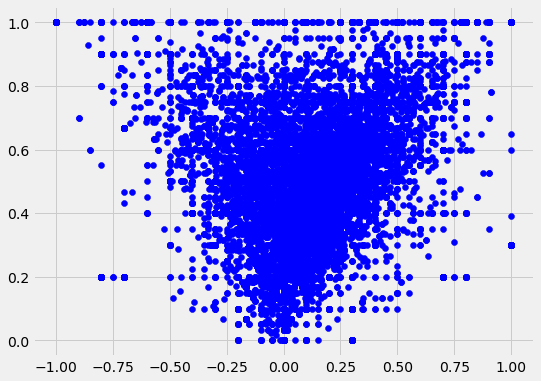

In [30]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, tweetsDf.shape[0]):
  plt.scatter(tweetsDf["Polarity"][i], tweetsDf["Subjectivity"][i], color='Blue') # plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

#### Printing the percentage of positive tweets

In [36]:
ptweets = tweetsDf[tweetsDf.Analysis == 'Positive']
ptweets = ptweets['text']
ptweets

round( (ptweets.shape[0] / tweetsDf.shape[0]) * 100 , 1)

32.2

#### Print the percentage of negative tweets

In [37]:
ntweets = tweetsDf[tweetsDf.Analysis == 'Negative']
ntweets = ntweets['text']
ntweets

round( (ntweets.shape[0] / tweetsDf.shape[0]) * 100, 1)

14.4

#### Printing the number of tweets tagged against each sentiment

In [38]:
tweetsDf['Analysis'].value_counts()

Neutral     27130
Positive    16334
Negative     7326
Name: Analysis, dtype: int64

#### Visually plotting value counts using matlplotlib bar chart

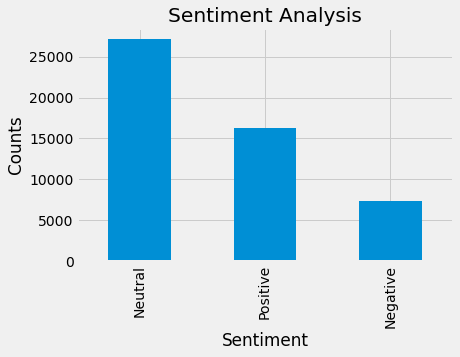

In [39]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweetsDf['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

#### **Predicting twitter sentiment using labeled data**
#### As seen above, We used TextBlob to find the sentiment of each tweet using its inbuilt function. 
#### Following code uses a labeled twitter dataset which will be trained using RandomForestClassifier to predict sentiment.
#### For this, we will import a dataset in which each tweet is labeled positive, neutral or negative.

In [8]:
twitterTrainedDf = pd.read_csv('twitter_train.csv')
print(twitterTrainedDf)

           textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  
0                    I`d have responded, if I were going   neutral

In [9]:
twitterTrainedDf['text'] = twitterTrainedDf['text'].astype(str)

In [10]:
twitterTrainedDf.text = twitterTrainedDf['text'].apply(cleanTxt)

In [11]:
twitterTrainedDf.text = twitterTrainedDf['text'].apply(tokenizeTweets)

#### Putting score based on the sentiment. Neutral/Positive = 1 and Negative = 0

In [12]:
# Create a function to compute negative (-1), neutral and positive (+1) analysis
def putScore(sentiment):
    if sentiment == 'negative':
      return 0
    else:
      return 1

twitterTrainedDf['score'] = twitterTrainedDf['sentiment'].apply(putScore)

# Show the dataframe
twitterTrainedDf

,textID,text,selected_text,sentiment,score
0,cb774db0d1,Id responded I going,"I`d have responded, if I were going",neutral,1
1,549e992a42,Sooo SAD I miss San Diego,Sooo SAD,negative,0
2,088c60f138,boss bullying,bullying me,negative,0
3,9642c003ef,interview leave alone,leave me alone,negative,0
4,358bd9e861,Sons couldnt put releases already bought,"Sons of ****,",negative,0
...,...,...,...,...,...
27476,4eac33d1c0,wish could come see u Denver husband lost job ...,d lost,negative,0
27477,4f4c4fc327,Ive wondered rake The client made clear NET do...,", don`t force",negative,0
27478,f67aae2310,Yay good Enjoy break probably need hectic week...,Yay good for both of you.,positive,1
27479,ed167662a5,But worth,But it was worth it ****.,positive,1


In [13]:
Sfeatures = twitterTrainedDf['text']
Slabels = twitterTrainedDf['score']

####  **Stemming**: Eliminating affixes (circumfixes, suffixes, prefixes, infixes) from a word in order to obtain a word stem. 
#####        Example: Working -> Work, trouble,troubling,troubled -> troubl
##### We are using PorterStemmer which  uses Suffix Stripping to produce stems.It is the most widely used technique because it is very fast.

In [14]:
ps = PorterStemmer()
Sfeatures = Sfeatures.apply(lambda x: x.split())
Sfeatures = Sfeatures.apply(lambda x : ' '.join([ps.stem(word) for word in x]))

#### TF-IDF is an abbreviation for Term Frequency-Inverse Document Frequency and is a very common algorithm to transform the text into a meaningful representation of numbers.

In [15]:
# vectorizing the data with maximum of 5000 features
tv = TfidfVectorizer(max_features = 5000)
#Sfeatures = list(Sfeatures)
Sfeatures = tv.fit_transform(Sfeatures.ravel())

#### Splitting our data into training and testing sets

In [16]:
Sfeatures_train,
Sfeatures_test, Slabels_train, Slabels_test = train_test_split(Sfeatures, Slabels, test_size = .05, random_state = 0)

In [23]:
rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)
rfc.fit(Sfeatures_train, Slabels_train)
print("Training Accuracy: ",rfc.score(Sfeatures_train, Slabels_train))
print("Validation Accuracy: ",rfc.score(Sfeatures_test, Slabels_test))
Slabels_pred_rfc = rfc.predict(Sfeatures_test)
print("F1 Score: ",f1_score(Slabels_test,Slabels_pred_rfc))

Training Accuracy:  0.9868229525779514
Validation Accuracy:  0.8218181818181818
F1 Score:  0.8781700646444555


#### After applying the RandomForestClassifier Model, the score is 80%.

In [24]:
from xgboost import XGBClassifier

In [25]:
xgb = XGBClassifier(n_estimators = 10, random_state = 0)
xgb.fit(Sfeatures_train, Slabels_train)
print("Training Accuracy: ",xgb.score(Sfeatures_train, Slabels_train))
print("Validation Accuracy: ",xgb.score(Sfeatures_test, Slabels_test))

C:\Users\ruchi\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy:  0.7938021910671876
Validation Accuracy:  0.7941818181818182


In [26]:
Slabels_pred_xgb = xgb.predict(Sfeatures_test)
print("F1 Score: ",f1_score(Slabels_test,Slabels_pred_xgb))

F1 Score:  0.8711879836140192


In [17]:
svcModel = SVC()
svcModel.fit(Sfeatures_train, Slabels_train)

Slabels_pred_svc = svcModel.predict(Sfeatures_test)

print("Training Accuracy :", svcModel.score(Sfeatures_train, Slabels_train))
print("Validation Accuracy :", svcModel.score(Sfeatures_test, Slabels_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Slabels_test,Slabels_pred_svc))

Training Accuracy : 0.939822263081284
Validation Accuracy : 0.8261818181818181
f1 score : 0.8860276585598474


In [19]:
lsvcModel = LinearSVC().fit(Sfeatures_train, Slabels_train)

Slabels_pred_lsvc = lsvcModel.predict(Sfeatures_test)

print("Training Accuracy :", lsvcModel.score(Sfeatures_train, Slabels_train))
print("Validation Accuracy :", lsvcModel.score(Sfeatures_test, Slabels_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Slabels_test,Slabels_pred_lsvc))

Training Accuracy : 0.8890293419137363
Validation Accuracy : 0.8174545454545454
f1 score : 0.8764155588380108


#### Saving our model in a pickle file, so we can use it for testing our twitter dataset.

In [20]:
import pickle
import json

In [21]:
words = tv.vocabulary_
words_for_json = {}
for k, v in words.items():
    words_for_json[k] = int(v)
#     pickle.dump(rfc, open('sentimentClassifier.pkl','wb'))
#     pickle.dump(xgb, open('sentimentClassifier.pkl_xgb','wb'))
    pickle.dump(lsvcModel, open('sentimentClassifier_lsvcModel.pkl','wb'))
with open('word_feature_space.json', 'w') as fp:
    json.dump(words_for_json, fp)

#### **Sarcasm detection**
#### We are going to follow same approach for detecting sarcasm. We haved a dataset of texts labeled whether they are sarcastic or not.

In [22]:
sarcasmTrainingData = pd.read_json('Sarcasm_Headlines_Dataset.json', lines = True)
sarcasmTrainingData

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


#### Checking for nulls and cleaning the dataset

In [23]:
print(sarcasmTrainingData.isnull().any(axis = 0))

article_link    False
headline        False
is_sarcastic    False
dtype: bool


In [24]:
sarcasmTrainingData['headline'] = sarcasmTrainingData['headline'].apply(lambda s : re.sub('[^a-zA-Z]', ' ', s))

In [25]:
Safeatures = sarcasmTrainingData['headline']
Salabels = sarcasmTrainingData['is_sarcastic']

#### Stemming the dataset

In [26]:
ps = PorterStemmer()
Safeatures = Safeatures.apply(lambda x: x.split())
Safeatures = Safeatures.apply(lambda x : ' '.join([ps.stem(word) for word in x]))

#### Vectorizing our data, splitting data into Train and Test set and applying the RFC model

In [27]:
# vectorizing the data with maximum of 5000 features
satv = TfidfVectorizer(max_features = 5000)
Safeatures = list(Safeatures)
Safeatures = satv.fit_transform(Safeatures).toarray()

In [28]:
Safeatures_train,
Safeatures_test, Salabels_train, Salabels_test = train_test_split(Safeatures, Salabels, test_size = .05, random_state = 0)

In [35]:
sarfc = RandomForestClassifier(n_estimators = 10, random_state = 0)
sarfc.fit(Safeatures_train, Salabels_train)
print(sarfc.score(Safeatures_train, Salabels_train))
print(sarfc.score(Safeatures_test, Salabels_test))
Salabels_pred_rfc = sarfc.predict(Safeatures_test)
print("F1 Score: ",f1_score(Salabels_test,Salabels_pred_rfc))

0.9882946439128207
0.7971556886227545
F1 Score:  0.7637314734088927


#### We have a score of 79% from RFC model

In [36]:
sa_xgb = XGBClassifier(n_estimators = 10, random_state = 0)
sa_xgb.fit(Safeatures_train, Salabels_train)
print("Training Accuracy: ",sa_xgb.score(Safeatures_train, Salabels_train))
print("Validation Accuracy: ",sa_xgb.score(Safeatures_test, Salabels_test))
Slabels_pred_xgb = sa_xgb.predict(Safeatures_test)
print("F1 Score: ",f1_score(Salabels_test,Slabels_pred_xgb))

C:\Users\ruchi\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:21:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy:  0.7315256374886691
Validation Accuracy:  0.7350299401197605
F1 Score:  0.7478632478632479


In [32]:
# sa_svcModel = SVC()
# sa_svcModel.fit(Safeatures_train, Salabels_train)

# Salabels_pred_svc = sa_svcModel.predict(Safeatures_test)

# print("Training Accuracy :", sa_svcModel.score(Safeatures_train, Salabels_train))
# print("Validation Accuracy :", sa_svcModel.score(Safeatures_test, Salabels_test))

# # calculating the f1 score for the validation set
# print("f1 score :", f1_score(Salabels_test,Salabels_pred_svc))

sa_lsvcModel = LinearSVC().fit(Safeatures_train, Salabels_train)

Salabels_pred_lsvc = sa_lsvcModel.predict(Safeatures_test)

print("Training Accuracy :", sa_lsvcModel.score(Safeatures_train, Salabels_train))
print("Validation Accuracy :", sa_lsvcModel.score(Safeatures_test, Salabels_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Salabels_test,Salabels_pred_lsvc))

Training Accuracy : 0.9093524612777362
Validation Accuracy : 0.8375748502994012
f1 score : 0.8153191489361702


#### Now saving our model to use it on our twitter dataset

In [33]:
sarcasm_words = satv.vocabulary_
sarcasm_words_for_json = {}
for k, v in sarcasm_words.items():
    sarcasm_words_for_json[k] = int(v)
    pickle.dump(sa_lsvcModel, open('sarcasmClassifier_sa_lsvcModel.pkl','wb'))
with open('sarcasm_word_feature_space.json', 'w') as sfp:
    json.dump(sarcasm_words_for_json, sfp)